# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np
import pandas as pd
import random

n_train = len(X_train)
n_validation = len(X_valid)
n_test = len(X_test)
image_shape = X_train[0].shape
n_classes = len(set(y_train))
label_dict = dict(zip(pd.read_csv("signnames.csv").values[:,0],pd.read_csv("signnames.csv").values[:,1]))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Example class: ", list(label_dict.items())[random.randint(0, n_classes)])

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Example class:  (28, 'Children crossing')


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

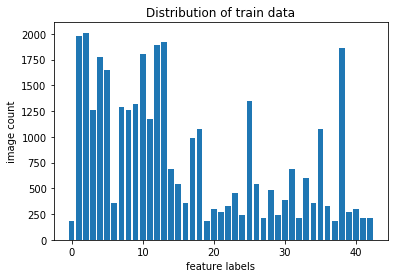

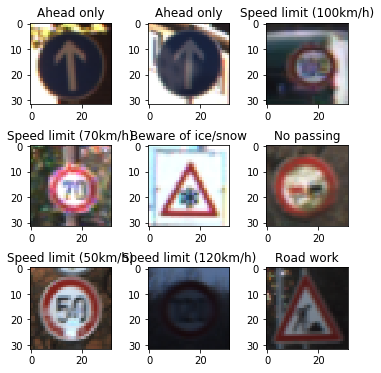

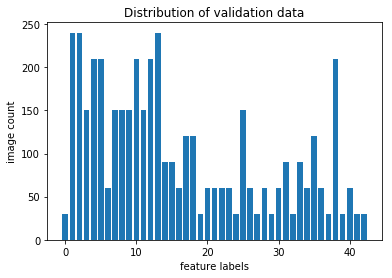

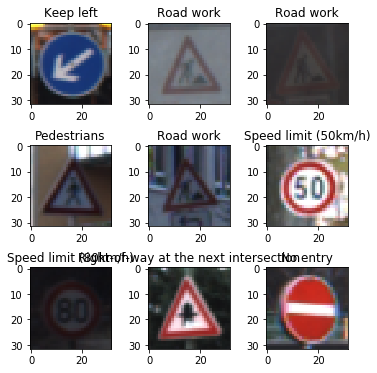

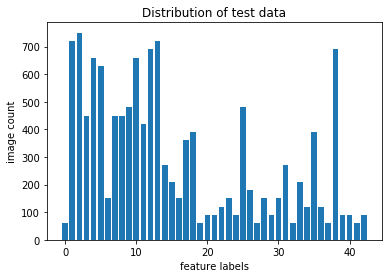

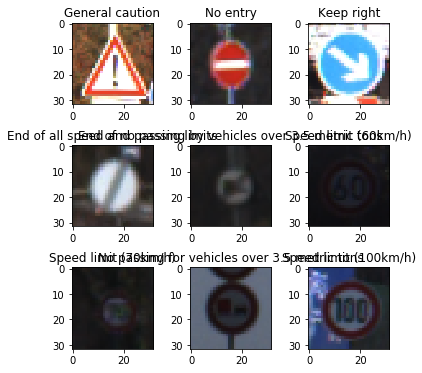

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from collections import Counter
import random
%matplotlib inline

image_dict_train = Counter(y_train)
image_dict_valid = Counter(y_valid)
image_dict_test = Counter(y_test)

# Visualizing TRAIN data
plt.figure(0)
plt.bar([i[0] for i in image_dict_train.items()], [i[1] for i in image_dict_train.items()])
plt.xlabel('feature labels')
plt.ylabel('image count')
plt.title('Distribution of train data')
plt.figure(1, figsize = (6,6))
gs = gridspec.GridSpec(3, 3)
gs.update(hspace=.5)
for i in range(9):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    plt.subplot(gs[i//3,i%3])
    plt.imshow(image)
    plt.title(str(label_dict[y_train[index]]))

# Visualizing VALIDATION data
plt.figure(2)
plt.bar([i[0] for i in image_dict_valid.items()], [i[1] for i in image_dict_valid.items()])
plt.xlabel('feature labels')
plt.ylabel('image count')
plt.title('Distribution of validation data')
plt.figure(3, figsize = (6,6))
gs = gridspec.GridSpec(3, 3)
gs.update(hspace=.5)
for i in range(9):
    index = random.randint(0, len(X_valid))
    image = X_valid[index]
    plt.subplot(gs[i//3,i%3])
    plt.imshow(image)
    plt.title(str(label_dict[y_valid[index]]))

# Visualizing TEST data
plt.figure(4)
plt.bar([i[0] for i in image_dict_test.items()], [i[1] for i in image_dict_test.items()])
plt.xlabel('feature labels')
plt.ylabel('image count')
plt.title('Distribution of test data')
plt.figure(5, figsize = (6,6))
gs = gridspec.GridSpec(3, 3)
gs.update(hspace=.5)
for i in range(9):
    index = random.randint(0, len(X_test))
    image = X_test[index]
    plt.subplot(gs[i//3,i%3])
    plt.imshow(image)
    plt.title(str(label_dict[y_test[index]]))

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Data augmentation

In [4]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

threshold = 950
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.15,
        height_shift_range=0.15,
        shear_range=0.3,
        zoom_range=0.15,
        horizontal_flip=False,
        fill_mode='nearest')

print("data augmentation")
X_classed = {}
for label in set(y_train):
    X_classed[label] = [X for i,X in enumerate(X_train) if y_train[i] == label]
for key in list(X_classed.keys()):
    if len(X_classed[key]) >= threshold:
        del X_classed[key]
    else:
        print(key, " - " ,label_dict[key], ":", len(X_classed[key]))
        
X_train_low = []
y_train_low = []

for key,val in X_classed.items():
    multiplier = (threshold // len(val)) + 1
    X_train_low += val*multiplier
    y_train_low += [key]*len(val)*multiplier
X_train_low = np.array(X_train_low)
y_train_low = np.array(y_train_low)
print("generated number of underrepresented features: ", len(X_train_low))
print(X_train_low.shape)
print(y_train_low.shape)

for X_batch, y_batch in datagen.flow(X_train_low, y_train_low, batch_size=len(X_train_low), shuffle=False):
    X_train_aug = X_batch.astype('uint8') 
    y_train_aug = y_batch
    break

del X_classed

Using TensorFlow backend.


data augmentation
0  -  Speed limit (20km/h) : 180
6  -  End of speed limit (80km/h) : 360
14  -  Stop : 690
15  -  No vehicles : 540
16  -  Vehicles over 3.5 metric tons prohibited : 360
19  -  Dangerous curve to the left : 180
20  -  Dangerous curve to the right : 300
21  -  Double curve : 270
22  -  Bumpy road : 330
23  -  Slippery road : 450
24  -  Road narrows on the right : 240
26  -  Traffic signals : 540
27  -  Pedestrians : 210
28  -  Children crossing : 480
29  -  Bicycles crossing : 240
30  -  Beware of ice/snow : 390
31  -  Wild animals crossing : 690
32  -  End of all speed and passing limits : 210
33  -  Turn right ahead : 599
34  -  Turn left ahead : 360
36  -  Go straight or right : 330
37  -  Go straight or left : 180
39  -  Keep left : 270
40  -  Roundabout mandatory : 300
41  -  End of no passing : 210
42  -  End of no passing by vehicles over 3.5 metric tons : 210
generated number of underrepresented features:  28738
(28738, 32, 32, 3)
(28738,)


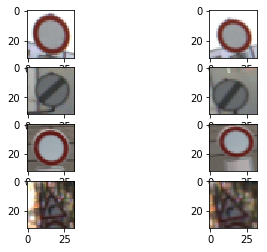

In [5]:
plt.figure(6)
gs = gridspec.GridSpec(4, 2)
gs.update()
for i in range(4):
    index = random.randint(0, len(X_train_aug))
    image1 = X_train_low[index].squeeze()
    image2 = X_train_aug[index].squeeze()
    plt.subplot(gs[i,0])
    plt.imshow(image1)
    plt.subplot(gs[i,1])
    plt.imshow(image2)
    
plt.show()

del X_train_low
del y_train_low

#### Save & Load augmented data

In [6]:
import pickle
training_aug_file = 'train_aug.p'

with open(training_aug_file, 'wb') as f:
    pickle.dump(
        {
            "train_features":X_train_aug,
            "train_labels":y_train_aug},
        f, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
import pickle
training_aug_file = 'train_aug.p'

with open(training_aug_file, mode='rb') as f:
    aug_data = pickle.load(f)
    X_train_aug = aug_data['train_features']
    y_train_aug = aug_data['train_labels']
    del aug_data
print("augmented data loaded")

augmented data loaded


#### Extend dataset with augmentation

feature number:  63537


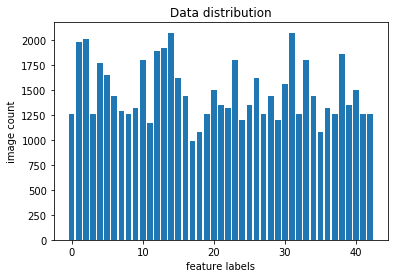

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from collections import Counter
import random
%matplotlib inline

X_train = np.concatenate((X_train, X_train_aug), axis=0)
y_train = np.concatenate((y_train, y_train_aug), axis=0).astype('uint8')
print("feature number: ", X_train.shape[0])

del X_train_aug
del y_train_aug

image_dict = Counter(y_train)
fig, ax1 = plt.subplots()
plt.bar([i[0] for i in image_dict.items()], [i[1] for i in image_dict.items()])
ax1.set_xlabel('feature labels')
ax1.set_ylabel('image count')
ax1.set_title('Data distribution')
plt.show()

#### Histogram equalization and normalization

Final dataset dimensions:
train:  (63537, 32, 32, 1)
valid:  (4410, 32, 32, 1)
test:  (12630, 32, 32, 1)


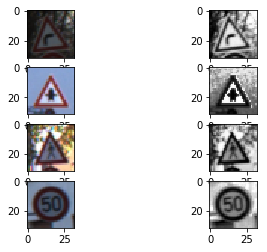

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
import cv2

def preprocess(data):
    imgs = np.ndarray((data.shape[0], 32, 32, 1), dtype=np.uint8)
    for i, img in enumerate(data):
        img = img.astype(np.uint8)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.equalizeHist(img)
        img = np.expand_dims(img, axis=2)
        imgs[i] = img
    data = imgs.astype('float32')
    return (-0.5) + (data - 0)*(0.5 - (-0.5))/(255 - 0)

plt.figure(7)
gs = gridspec.GridSpec(4, 2)
gs.update()
rand_i = []
for i in range(4):
    index = random.randint(0, len(X_train))
    rand_i.append(index)
    image = X_train[index].squeeze()
    plt.subplot(gs[i,0])
    plt.imshow(image)

X_train = preprocess(X_train)
X_test = preprocess(X_test)
X_valid = preprocess(X_valid)

for i, index in enumerate(rand_i):
    image = X_train[index].squeeze()
    plt.subplot(gs[i,1])
    plt.imshow(image, cmap='gray')

print("Final dataset dimensions:")
print("train: ", X_train.shape)
print("valid: ", X_valid.shape)
print("test: ", X_test.shape)

plt.show()

### Model Architecture

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 20
BATCH_SIZE = 256

mu = 0
sigma = 0.1

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

weights = {
    'wc1': tf.Variable(tf.truncated_normal([3, 3, 1, 64], mean = mu, stddev = sigma)),
    'wc2': tf.Variable(tf.truncated_normal([3, 3, 64, 128], mean = mu, stddev = sigma)),
    'wc3': tf.Variable(tf.truncated_normal([3, 3, 128, 256], mean = mu, stddev = sigma)),
    'wc4': tf.Variable(tf.truncated_normal([3, 3, 256, 256], mean = mu, stddev = sigma)),
    'wd1': tf.Variable(tf.truncated_normal([4*4*256, 400], mean = mu, stddev = sigma)),
    'wd2': tf.Variable(tf.truncated_normal([400, 200], mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal([200, 43], mean = mu, stddev = sigma))}

biases = {
    'bc1': tf.Variable(tf.zeros([64])),
    'bc2': tf.Variable(tf.zeros([128])),
    'bc3': tf.Variable(tf.zeros([256])),
    'bc4': tf.Variable(tf.zeros([256])),
    'bd1': tf.Variable(tf.zeros([400])),
    'bd2': tf.Variable(tf.zeros([200])),
    'out': tf.Variable(tf.zeros([43]))}

In [19]:
def LeNet(x):
    # Layer 1: Convolutional(32x32x1 >> 32x32x64); Activation(-); Pooling(32x32x64 >> 16x16x64) 
    conv1 = tf.nn.conv2d(x, weights['wc1'], strides=[1, 1, 1 ,1], padding='SAME') + biases['bc1']
    conv1 = tf.nn.leaky_relu(conv1,alpha=0.02, name = 'relu1')
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # Layer 2: Convolutional(16x16x64 >> 16x16x128); Activation(-); Pooling(16x16x128 >> 8x8x128)
    conv2 = tf.nn.conv2d(conv1, weights['wc2'], strides=[1, 1, 1 ,1], padding='SAME') + biases['bc2']
    conv2 = tf.nn.leaky_relu(conv2,alpha=0.02, name = 'relu2')
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # Layer 3: Convolutional(8x8x128 >> 8x8x256); Activation(-); Dropout(-)
    conv3 = tf.nn.conv2d(conv2, weights['wc3'], strides=[1, 1, 1, 1], padding='SAME') + biases['bc3']
    conv3 = tf.nn.leaky_relu(conv3,alpha=0.02, name = 'relu3')
    conv3 = tf.nn.dropout(conv3, keep_prob)
    
    # Layer 4: Convolutional(8x8x256 >> 8x8x256); Activation(-); Pooling(8x8x256 >> 4x4x256)
    conv4 = tf.nn.conv2d(conv3, weights['wc4'], strides=[1, 1, 1, 1], padding='SAME') + biases['bc4']
    conv4 = tf.nn.leaky_relu(conv4,alpha=0.02, name = 'relu4')
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv4 = tf.nn.dropout(conv4, keep_prob)
    
    # Layer 5: Flatten(4x4x256 >> 4096); Fully Connected(4096 >> 400); Activation(-); Dropout(-)
    fc1 = flatten(conv4)
    fc1 = tf.matmul(fc1, weights['wd1']) + biases['bd1']
    fc1 = tf.nn.leaky_relu(fc1,alpha=0.02, name = 'relu5')
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # Layer 6: Fully Connected(400 >> 200); Activation(-); Dropout(-)
    fc2 = tf.matmul(fc1, weights['wd2']) + biases['bd2']
    fc2 = tf.nn.leaky_relu(fc2,alpha=0.02, name = 'relu6')
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 7: Fully Connected(200 >> 43)
    logits = tf.matmul(fc2, weights['out']) + biases['out']
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Training pipeline

In [20]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.001
beta = 0.015

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
## Loss function using L2 Regularization
regularizer = tf.nn.l2_loss(weights['wc1']) + tf.nn.l2_loss(weights['wc2']) + tf.nn.l2_loss(weights['wd1']) + \
    tf.nn.l2_loss(weights['wd2']) + tf.nn.l2_loss(weights['out'])
loss_operation = tf.reduce_mean(loss_operation + beta * regularizer)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#### Evaluation pipeline

In [21]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### Training the model

Training...

EPOCH 1 ...
Training Accuracy = 0.201
Validation Accuracy = 0.223

EPOCH 2 ...
Training Accuracy = 0.603
Validation Accuracy = 0.612

EPOCH 3 ...
Training Accuracy = 0.787
Validation Accuracy = 0.768

EPOCH 4 ...
Training Accuracy = 0.862
Validation Accuracy = 0.851

EPOCH 5 ...
Training Accuracy = 0.922
Validation Accuracy = 0.919

EPOCH 6 ...
Training Accuracy = 0.925
Validation Accuracy = 0.931

EPOCH 7 ...
Training Accuracy = 0.948
Validation Accuracy = 0.949

EPOCH 8 ...
Training Accuracy = 0.948
Validation Accuracy = 0.945

EPOCH 9 ...
Training Accuracy = 0.963
Validation Accuracy = 0.958

EPOCH 10 ...
Training Accuracy = 0.973
Validation Accuracy = 0.969

EPOCH 11 ...
Training Accuracy = 0.972
Validation Accuracy = 0.965

EPOCH 12 ...
Training Accuracy = 0.968
Validation Accuracy = 0.954

EPOCH 13 ...
Training Accuracy = 0.973
Validation Accuracy = 0.960

EPOCH 14 ...
Training Accuracy = 0.976
Validation Accuracy = 0.965

EPOCH 15 ...
Training Accuracy = 0.978
Valid

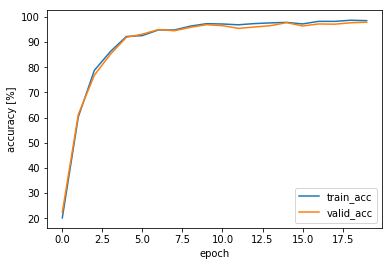

In [22]:
train_accuracies = []
valid_accuracies = []
best_acc = .0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training...")
    print()
    for epoch_i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.6})
        train_accuracy = evaluate(X_train,y_train)    
        valid_accuracy = evaluate(X_valid, y_valid)
        train_accuracies.append(train_accuracy*100)
        valid_accuracies.append(valid_accuracy*100)
        print("EPOCH {} ...".format(epoch_i+1))
        print("Training Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(valid_accuracy))
        print()
        if valid_accuracy > best_acc:
            best_acc = valid_accuracy
            saver.save(sess, './traffic_sign_classifier_net')

plt.plot(train_accuracies)
plt.plot(valid_accuracies)
plt.legend(['train_acc', 'valid_acc'])
plt.ylabel('accuracy [%]')
plt.xlabel('epoch')
plt.show()

### Results

#### Accuracy of the model

In [23]:
with tf.Session() as sess:
    saver.restore(sess, './traffic_sign_classifier_net')
    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    valid_accuracy = evaluate(X_valid, y_valid)
    print("Validation Accuracy = {:.3f}".format(valid_accuracy))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./traffic_sign_classifier_net
Train Accuracy = 0.985
Validation Accuracy = 0.979
Test Accuracy = 0.931


#### Detailed performance per class

In [24]:
from sklearn.metrics import classification_report

with tf.Session() as sess:
    saver.restore(sess, './traffic_sign_classifier_net')
    y_pred = []
    for offset in range(0, len(y_test), 1024):
        end = offset + 1024
        batch_x, batch_y = X_test[offset:end], y_test[offset:end]
        batch_pred = sess.run(tf.argmax(logits, 1), feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        y_pred = np.concatenate((y_pred,batch_pred), axis=0)
    print(len(y_pred), len(y_test))

print(classification_report(y_test, y_pred, target_names = label_dict.values()))

INFO:tensorflow:Restoring parameters from ./traffic_sign_classifier_net
12630 12630
                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.56      0.82      0.67        60
                              Speed limit (30km/h)       0.99      0.85      0.92       720
                              Speed limit (50km/h)       0.80      1.00      0.89       750
                              Speed limit (60km/h)       0.91      0.93      0.92       450
                              Speed limit (70km/h)       0.98      0.90      0.94       660
                              Speed limit (80km/h)       0.91      0.83      0.87       630
                       End of speed limit (80km/h)       0.99      0.76      0.86       150
                             Speed limit (100km/h)       0.98      0.88      0.93       450
                             Speed limit (120km/h)       0.83      0.96      0.89      

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

number of images:  43 
with shape:  (32, 32, 3)


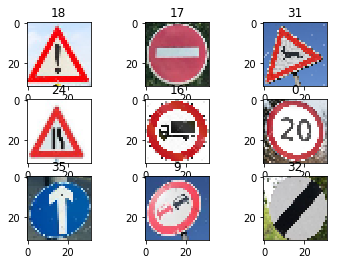

In [25]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random
%matplotlib inline

### Load the images and plot them here.
X_examples = []
y_examples = [title.split('.')[0] for title in os.listdir('./examples')]
for title in os.listdir('./examples'):
    image = cv2.imread(os.path.join('./examples', title))
    image = cv2.resize(image, (32, 32))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    X_examples.append(image)
    
print("number of images: ", len(X_examples), "\nwith shape: " , X_examples[0].shape)

plt.figure(8)
gs = gridspec.GridSpec(3, 3)
gs.update()
indexes = random.sample(range(43), 10)
for i in range(9):
    image = X_examples[indexes[i]].squeeze()
    plt.subplot(gs[i//3,i%3])
    plt.imshow(image)
    plt.title(y_examples[indexes[i]])

### Predict the Sign Type for Each Image

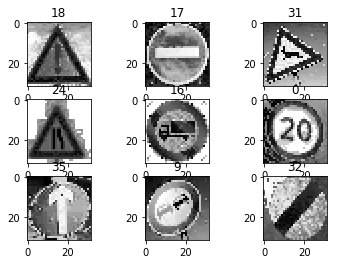

In [26]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

X_examples = np.array(X_examples)
X_examples_proc = preprocess(X_examples)
plt.figure(9)
gs = gridspec.GridSpec(3, 3)
gs.update()
for i in range(9):
    image = X_examples_proc[indexes[i]].squeeze()
    plt.subplot(gs[i//3,i%3])
    plt.imshow(image, cmap='gray')
    plt.title(y_examples[indexes[i]])

In [27]:
from sklearn.metrics import classification_report

with tf.Session() as sess:
    saver.restore(sess, './traffic_sign_classifier_net')
    predictions = sess.run(logits,feed_dict={x: X_examples_proc, y: y_examples, keep_prob: 1.0})
    # y_pred = sess.run(tf.argmax(logits, 1), feed_dict={x: X_examples_proc, y: y_examples, keep_prob: 1.0})
print()

for i, image in enumerate(predictions):
    label = label_dict[int(y_examples[i])]
    prediction = label_dict[np.argmax(image)]
    print("%2d"%i, ":", "%5s"%(label == prediction),"%36s  ==  %s" % (label[:min(len(label),32)], prediction[:min(len(prediction),32)]))

# print(classification_report(list(map(int, y_examples)), y_pred))

INFO:tensorflow:Restoring parameters from ./traffic_sign_classifier_net

 0 :  True                 Speed limit (20km/h)  ==  Speed limit (20km/h)
 1 : False                 Speed limit (30km/h)  ==  Speed limit (20km/h)
 2 :  True     No passing for vehicles over 3.5  ==  No passing for vehicles over 3.5
 3 :  True     Right-of-way at the next interse  ==  Right-of-way at the next interse
 4 :  True                        Priority road  ==  Priority road
 5 :  True                                Yield  ==  Yield
 6 :  True                                 Stop  ==  Stop
 7 :  True                          No vehicles  ==  No vehicles
 8 : False     Vehicles over 3.5 metric tons pr  ==  Stop
 9 :  True                             No entry  ==  No entry
10 :  True                      General caution  ==  General caution
11 :  True          Dangerous curve to the left  ==  Dangerous curve to the left
12 :  True                 Speed limit (50km/h)  ==  Speed limit (50km/h)
13 :  True    

### Analyze Performance

In [28]:
### Calculate the accuracy for these new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, './traffic_sign_classifier_net')
    test_accuracy = evaluate(X_examples_proc, y_examples)
    print()
    print("Test Accuracy = {:.3f}".format(test_accuracy))


INFO:tensorflow:Restoring parameters from ./traffic_sign_classifier_net

Test Accuracy = 0.814


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

INFO:tensorflow:Restoring parameters from ./traffic_sign_classifier_net


C:\Miniconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


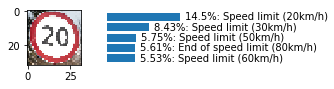

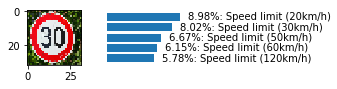

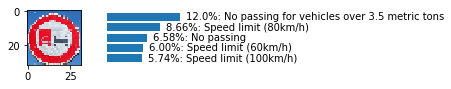

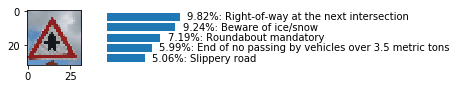

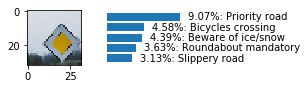

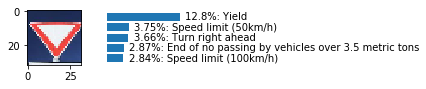

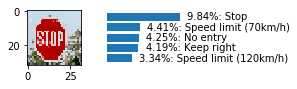

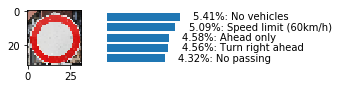

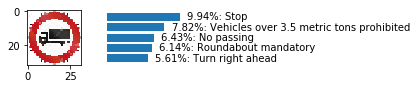

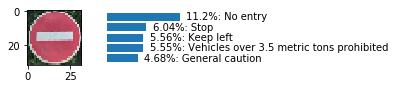

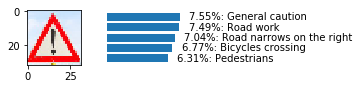

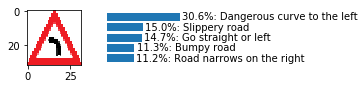

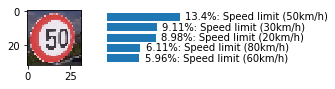

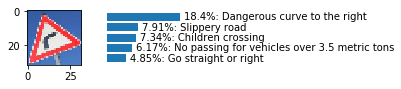

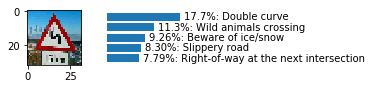

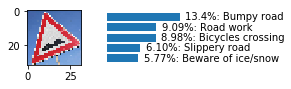

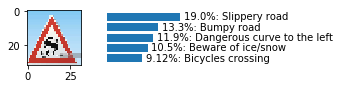

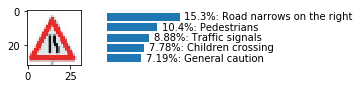

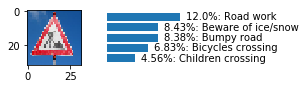

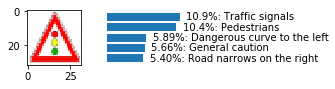

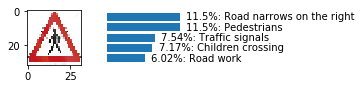

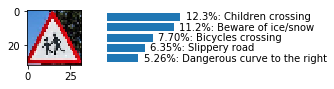

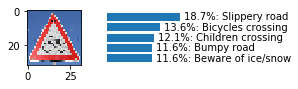

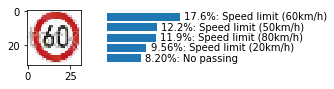

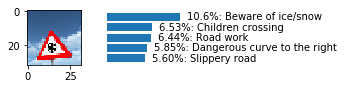

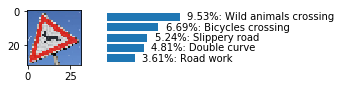

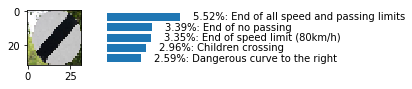

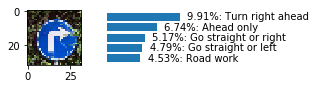

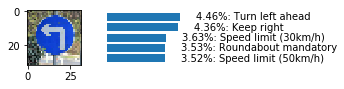

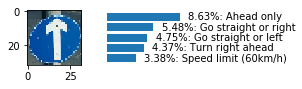

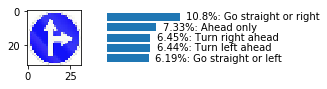

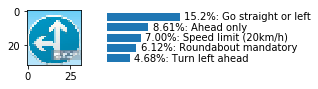

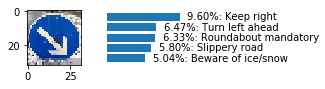

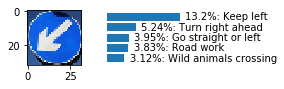

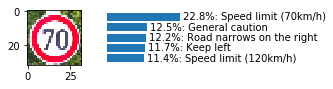

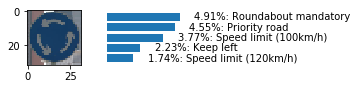

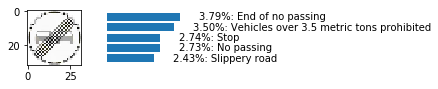

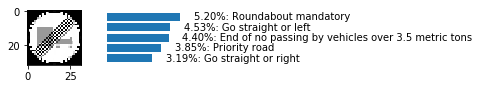

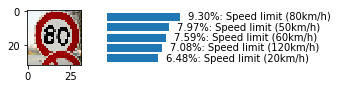

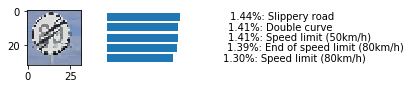

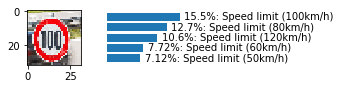

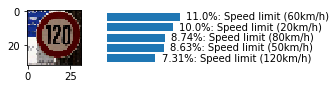

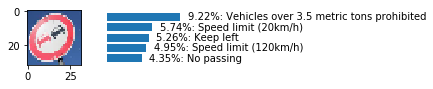

In [29]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, './traffic_sign_classifier_net')
    pred = sess.run([tf.nn.top_k(logits, k=5)], feed_dict={x: X_examples_proc, y: y_examples, keep_prob: 1.0})
    
for i in range(43):
    plt.figure(figsize = (3,1))
    plt.subplot(1,2,1)
    plt.imshow(X_examples[i])
    plt.subplot(1,2,2)
    plt.barh(list(range(6,1,-1)),pred[0][0][i])
    for label in range(5):
        plt.text(pred[0][0][i][label]+1,6-label-.3,
                 "%.4s"%str(pred[0][0][i][label])+"%: "+label_dict[pred[0][1][i][label]])
    plt.axis('off')

plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [30]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(min(48,featuremaps)):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from ./traffic_sign_classifier_net


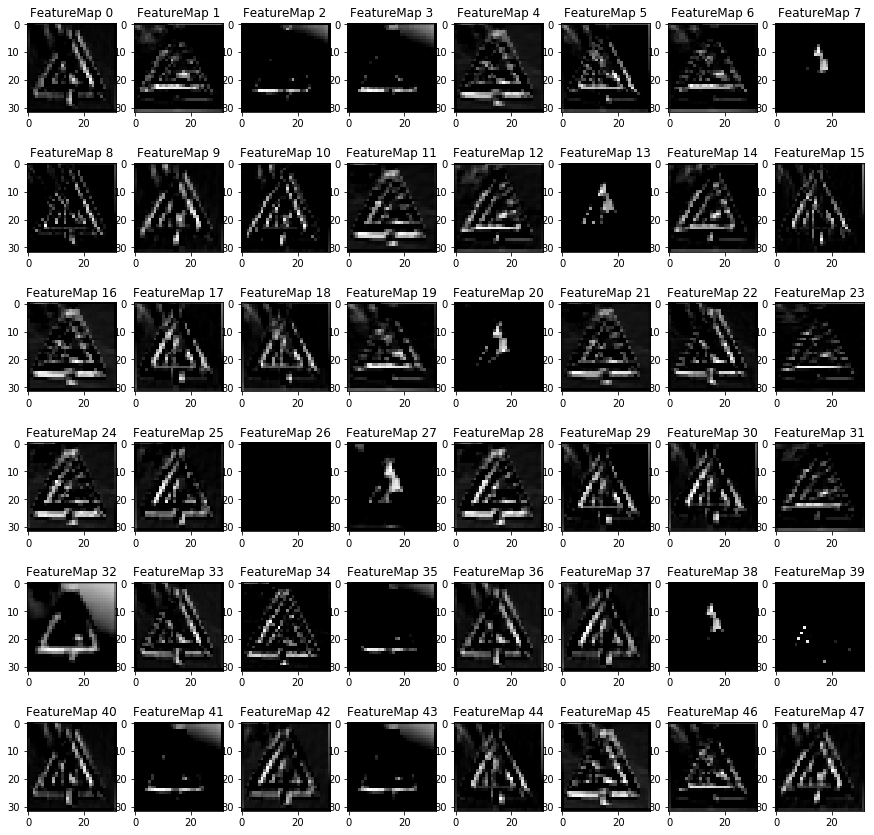

In [31]:
with tf.Session() as sess:
    saver.restore(sess, './traffic_sign_classifier_net')
    X_examples_proc, y_examples = shuffle(X_examples_proc, y_examples)
    relu1 = tf.get_default_graph().get_tensor_by_name("relu1:0")
    outputFeatureMap(X_examples_proc, relu1)    


INFO:tensorflow:Restoring parameters from ./traffic_sign_classifier_net


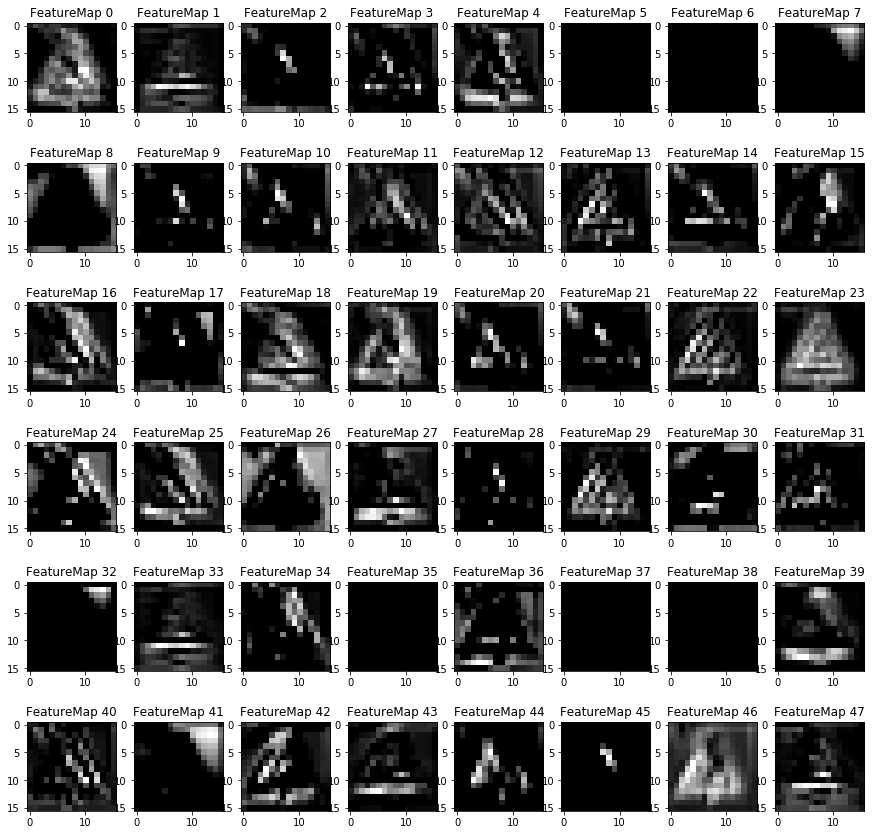

In [32]:
with tf.Session() as sess:
    saver.restore(sess, './traffic_sign_classifier_net')
    
    relu2 = tf.get_default_graph().get_tensor_by_name("relu2:0")
    outputFeatureMap(X_examples_proc, relu2)

INFO:tensorflow:Restoring parameters from ./traffic_sign_classifier_net


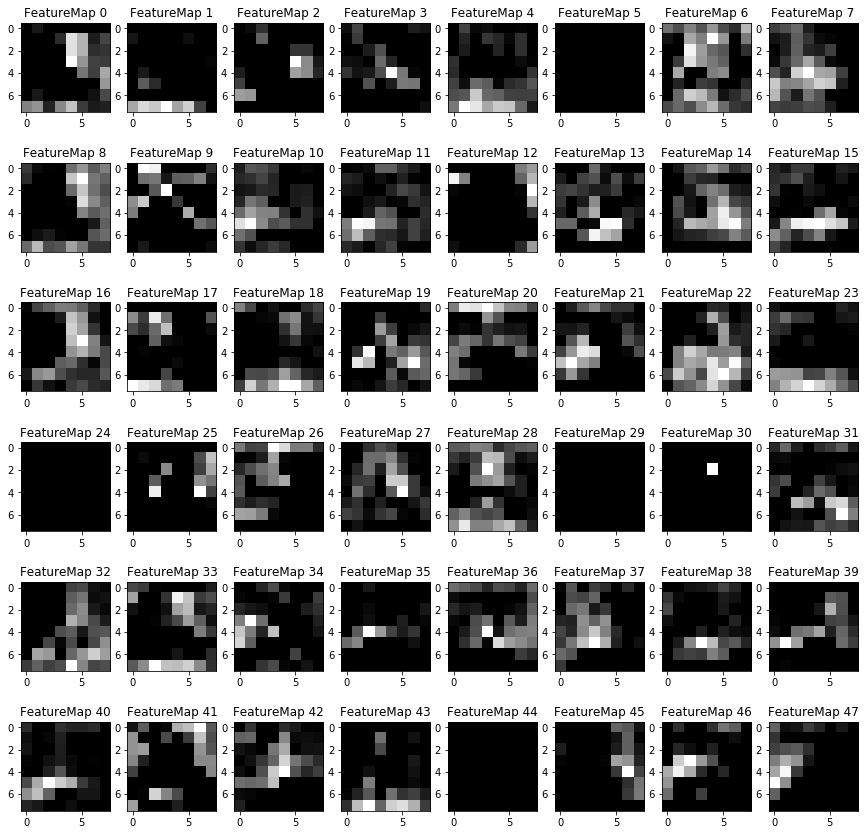

In [33]:
with tf.Session() as sess:
    saver.restore(sess, './traffic_sign_classifier_net')
    
    relu3 = tf.get_default_graph().get_tensor_by_name("relu3:0")
    outputFeatureMap(X_examples_proc, relu3)